In [4]:
!pip install --upgrade --editable gym-env

Obtaining file:///C:/Users/shive/OneDrive/Desktop/Sem%205/CS698/ForagingReplenishingPatches/gym-env
  Attempting uninstall: gym-env
    Found existing installation: gym-env 1.0.0
    Uninstalling gym-env-1.0.0:
      Successfully uninstalled gym-env-1.0.0
  Running setup.py develop for gym-env


In [2]:
import gym
import gym_env
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

env = gym.make('foraging-replenishing-patches-v0')

env.reset()
for i in range(300):
    action = np.random.randint(9)
    state, reward, done, _ = env.step(action)
    print(action, state, reward, done)
    if done:
        break

0 0 0 False
4 4 0 False
5 5 0 False
4 4 0 False
5 5 0 False
4 4 0 False
4 4 0 False
2 2 0 False
4 4 0 False
7 7 0 False
3 3 0 False
8 3 0 False
5 5 0 False
3 3 0 False
7 7 0 False
0 0 0 False
4 4 0 False
2 2 0 False
2 2 0 False
1 1 0 False
6 6 0 False
8 6 63.0 False
8 6 119.7 False
3 3 119.7 False
5 5 119.7 False
2 2 119.7 False
6 6 119.7 False
1 1 119.7 False
7 7 119.7 False
7 7 119.7 False
7 7 119.7 False
6 6 119.7 False
6 6 119.7 False
3 3 119.7 False
1 1 119.7 False
7 7 119.7 False
3 3 119.7 False
4 4 119.7 False
3 3 119.7 False
5 5 119.7 False
3 3 119.7 False
0 0 119.7 False
2 2 119.7 False
6 6 119.7 False
7 7 119.7 False
6 6 119.7 False
0 0 119.7 False
7 7 119.7 False
5 5 119.7 False
8 5 119.7 False
7 7 119.7 False
5 5 119.7 False
6 6 119.7 False
3 3 119.7 False
8 3 119.7 False
0 0 119.7 False
0 0 119.7 False
8 0 119.7 False
8 0 119.7 False
8 0 119.7 False
5 5 119.7 False
8 5 119.7 False
2 2 119.7 False
6 6 119.7 False
8 6 170.1 False
3 3 170.1 False
8 3 170.1 False
6 6 170.1 Fal

In [3]:
def pureGreedy(env,maxEpisodes, maxTime=300, optimistic=True):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  if optimistic == True:
    Q = np.ones(env.action_space.n-1)*10**4

  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
        a = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q))))
        s, r, terminal, info = env.step(a)
        s, r, terminal, info = env.step(8)
        N[a] += 1
        Q[a] += (r-reward-Q[a])/N[a]
        reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [3]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = pureGreedy(env=genv, maxEpisodes=50, optimistic=True)
print(rs)

[528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001]


In [4]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = pureGreedy(env=genv, maxEpisodes=50, optimistic=False)
print(rs)

[528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001]


In [4]:
def pureExplore(env,maxEpisodes, maxTime=300):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
        a = np.random.randint(env.action_space.n-1)
        s, r, terminal, info = env.step(a)
        s, r, terminal, info = env.step(8)
        N[a] += 1
        Q[a] += (r-reward-Q[a])/N[a]
        reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [6]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = pureExplore(env=genv, maxEpisodes=50)
print(rs)

[4324.499999999998, 4180.5, 4116.6, 4653.9, 5291.1, 4785.3, 5070.6, 4471.2, 4024.799999999999, 5386.499999999999, 4929.3, 3680.9999999999995, 4973.399999999999, 5035.499999999997, 4924.800000000001, 4828.5, 4765.500000000001, 5289.300000000001, 4233.600000000001, 5391.0, 4561.199999999999, 5443.199999999998, 4801.5, 4931.999999999998, 4084.2000000000003, 5319.900000000002, 3701.7, 5423.399999999999, 3807.0, 4634.1, 5388.3, 5782.499999999999, 3608.100000000001, 5048.099999999999, 4842.900000000001, 3930.3, 4306.5, 4328.100000000001, 5499.000000000002, 4272.299999999999, 5223.5999999999985, 4606.200000000001, 4852.8, 4236.299999999999, 3951.000000000001, 4358.7, 5113.800000000001, 4546.8, 4401.000000000001, 4346.0999999999985]


In [5]:
def epsGreedy(env,eps, maxEpisodes,maxTime=300):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
        if np.random.rand(1) < eps:
            a = np.random.randint(env.action_space.n-1)
        else:
            a = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q))))        
        s, r, terminal, info = env.step(a)
        s, r, terminal, info = env.step(8)
        N[a] += 1
        Q[a] += (r-reward-Q[a])/N[a]
        reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [8]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = epsGreedy(env=genv, eps=0.3, maxEpisodes=50)
print(rs)

[9932.4, 10622.699999999999, 9713.700000000003, 10060.199999999999, 10515.599999999997, 9304.199999999999, 10578.600000000006, 10384.200000000004, 10875.599999999997, 10323.9, 10151.100000000002, 10015.2, 9251.1, 10753.199999999997, 10179.000000000004, 10806.299999999996, 10681.200000000003, 10935.000000000004, 9211.499999999998, 10027.799999999996, 9911.700000000003, 10181.699999999997, 11334.600000000006, 9422.100000000002, 11425.499999999995, 9129.600000000002, 8535.599999999999, 10159.2, 9709.2, 10913.400000000001, 10417.499999999998, 10868.399999999998, 10972.800000000001, 11040.300000000007, 10689.299999999994, 9960.300000000001, 9328.500000000002, 10934.999999999995, 10147.5, 10789.2, 9971.1, 9886.500000000002, 10498.500000000004, 10503.000000000002, 10106.099999999999, 11096.999999999998, 10705.499999999998, 10182.599999999999, 8589.600000000002, 10569.599999999999]


In [6]:
def decEpsGreedy(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  actions = []
  for i in range(maxEpisodes):
    a_s = []
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))

      if np.random.rand(1) < eps:
        a = np.random.randint(env.action_space.n-1)
      else:
        a = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q))))
      s, r, terminal, info = env.step(a)
      s, r, terminal, info = env.step(8)
      a_s.append(a)
      a_s.append(8)
      N[a] += 1
      Q[a] += (r-reward-Q[a])/N[a]
      reward = r
    rewards.append(reward)
    Q_est[i] = Q
    actions.append(a_s)
  return Q_est, rewards, actions

In [7]:
genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
genv.reset()
_,rs, a_s = decEpsGreedy(env=genv, maxEpisodes=200, eps_start=1, eps_end=0.1, decayType='exponential', decayTill=125)
print(len(a_s))

200


In [30]:
print(rs[-1])

20146.49999999999


In [14]:
genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
genv.reset()
_,rs,_ = decEpsGreedy(env=genv, maxEpisodes=1000, eps_start=1, eps_end=0.1, decayType='exponential', decayTill=500)

In [15]:
print(max(rs))

17199.0


In [6]:
def UCB(env, maxEpisodes, c, maxTime=300):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    count = 0
    while env.time_elapsed < maxTime:
      if count < env.action_space.n-1:
        a = count
      else:
        U = c*np.sqrt(np.log(i+1)/N)
        a = np.random.choice(np.flatnonzero(np.isclose(Q+U, np.max(Q+U))))
      s, r, terminal, info = env.step(a)
      count += 1
      s, r, terminal, info = env.step(8)
      # print(a, env.time_elapsed, r-reward)

      N[a] += 1
      Q[a] += (r-reward-Q[a])/N[a]
      reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [13]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = UCB(env=genv, maxEpisodes=50, c=0.3)
print(rs)

[15642.000000000013, 15497.10000000001, 15169.50000000001, 15859.80000000001, 15098.400000000014, 15065.100000000011, 15487.200000000006, 15480.000000000011, 15385.500000000011, 15346.800000000012, 14807.70000000001, 15097.50000000001, 15002.100000000004, 14885.10000000001, 15503.400000000012, 15030.000000000013, 15542.100000000008, 15106.500000000011, 15242.400000000003, 14453.100000000008, 14890.50000000001, 15205.500000000011, 14981.400000000009, 15114.600000000011, 15177.600000000008, 14980.500000000007, 15416.10000000001, 14987.70000000001, 15347.700000000006, 15078.600000000011, 14829.30000000001, 15523.200000000008, 15077.700000000012, 14859.00000000001, 14933.700000000008, 15048.00000000001, 15120.000000000011, 15476.40000000001, 14949.90000000001, 15148.800000000007, 15063.300000000008, 14648.400000000009, 15336.900000000009, 14982.300000000012, 14799.60000000001, 14898.600000000008, 15518.700000000006, 15100.200000000012, 14970.600000000008, 15175.800000000012]


In [7]:
def softMax(env, maxEpisodes, temp_start, temp_end, maxTime=300):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
      temp = temp_start + i*(temp_end-temp_start)/(maxEpisodes-1)
      probs = np.exp(Q/temp)/np.sum(np.exp(Q/temp))
      a = np.random.choice(a=env.action_space.n-1, p=probs)
      s, r, terminal, info = env.step(a)
      s, r, terminal, info = env.step(8)
      N[a] += 1
      Q[a] += (r-reward-Q[a])/N[a]
      reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [8]:
def AvgRewardsNGaussianBandits(N=50, episodes=10**3, block_type=3, decayTill=200):
    skipFirstN = 0
    pureGreedy_R = []
    pureExplore_R = []
    epsGreedy_R = []
    decExpEpsGreedy_R = []
    decLinEpsGreedy_R = []
    UCB_R = []
    softMax_R = []

    for i in tqdm(range(N)):
        genv = gym.make('foraging-replenishing-patches-v0', block_type=block_type)
        _,rs = pureGreedy(env=genv, maxEpisodes = episodes)
        pureGreedy_R.append(rs)
        _,rs = pureExplore(env=genv, maxEpisodes=episodes)
        pureExplore_R.append(rs)
        _,rs = epsGreedy(env=genv, maxEpisodes=episodes, eps=0.3)
        epsGreedy_R.append(rs)
        _,rs = decEpsGreedy(env=genv, maxEpisodes=episodes, eps_start=1, eps_end=0.1, decayType='exponential', decayTill=decayTill)
        decExpEpsGreedy_R.append(rs)
        _,rs = decEpsGreedy(env=genv, maxEpisodes=episodes, eps_start=1, eps_end=0.1, decayType='linear', decayTill=decayTill)
        decLinEpsGreedy_R.append(rs)
        _,rs = UCB(env=genv, maxEpisodes=episodes, c=0.3)
        UCB_R.append(rs)
        # _,rs = softMax(env=genv, maxEpisodes=episodes, temp_start=10**2, temp_end=0.01)
        # softMax_R.append(rs)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.title("Average Rewards across Time Steps for Agents in Multi Armed Bandits")
    plt.xlabel('Episodes')
    plt.ylabel('Average Reward') 
    plt.plot(np.arange(episodes-skipFirstN), np.mean(pureGreedy_R,axis=0), label='Pure Greedy')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(pureExplore_R,axis=0), label='Pure Explore')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(epsGreedy_R,axis=0), label='Eps=0.3 Greedy')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(decExpEpsGreedy_R,axis=0), label='Decaying (1->0.1) Exp Eps Greedy')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(decLinEpsGreedy_R,axis=0), label='Decaying (1->0.1) Linear Eps Greedy')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(UCB_R,axis=0), label='UCB')
    # plt.plot(np.arange(episodes), np.mean(softMax_R,axis=0), label='Soft Max')
    plt.legend()
    plt.show()  

100%|██████████| 1/1 [02:33<00:00, 153.79s/it]


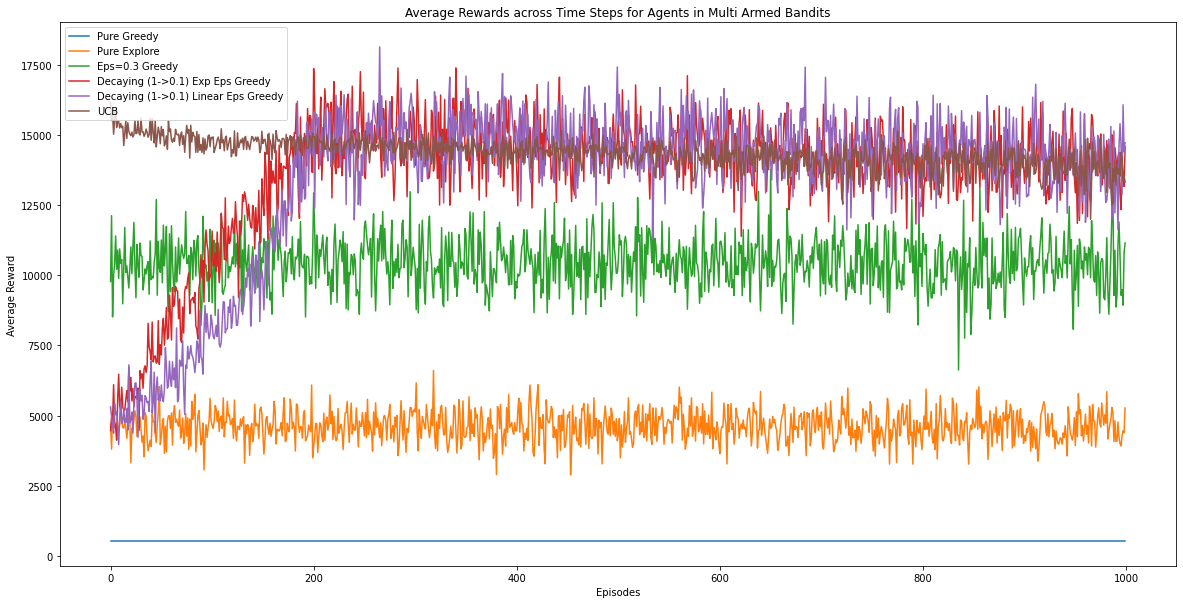

In [27]:
# decaying epsilon greedy, but decays till 200 episodes and constant afterwards
AvgRewardsNGaussianBandits(N=1, episodes=1000, block_type=1)

100%|██████████| 1/1 [01:49<00:00, 109.59s/it]


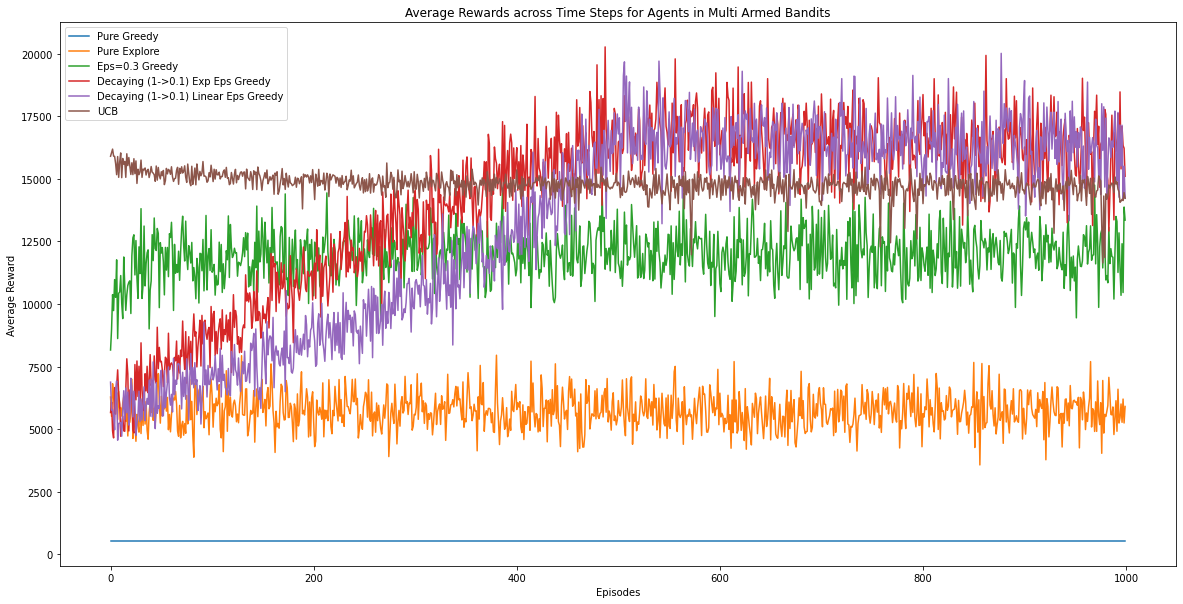

In [9]:
#decaying epsilon greedy, but decays to final value of 0.1 till the last episode
AvgRewardsNGaussianBandits(N=1, episodes=1000, block_type=2, decayTill=500)

100%|██████████| 1/1 [01:37<00:00, 97.55s/it]


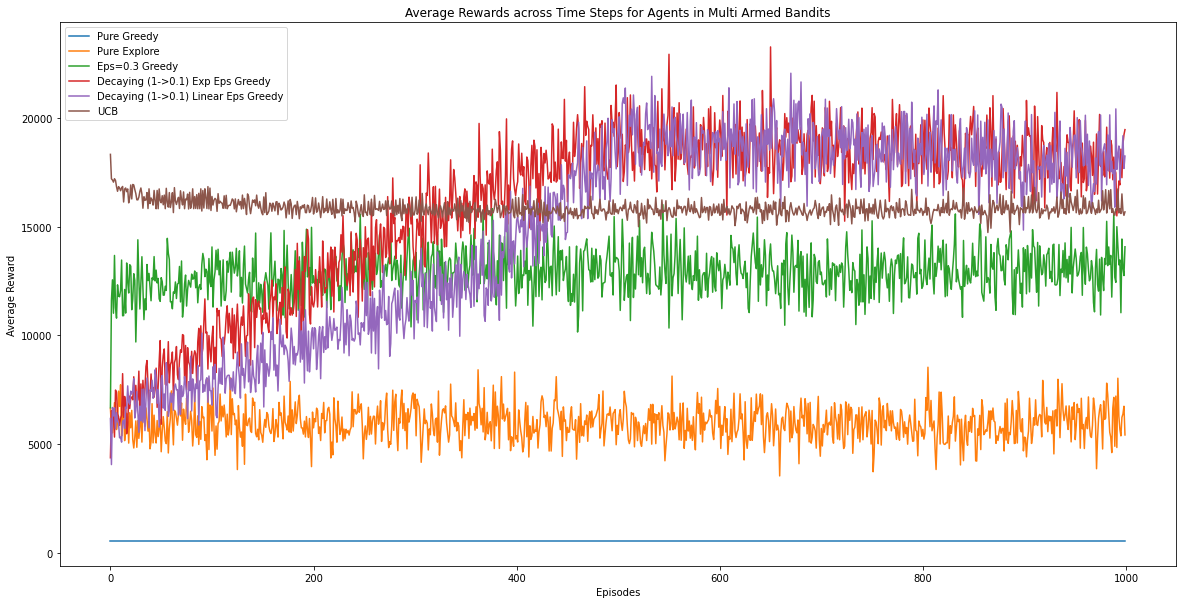

In [10]:
#decaying epsilon greedy, but decays to final value of 0.1 till the last episode
AvgRewardsNGaussianBandits(N=1, episodes=1000, block_type=3, decayTill=500)

100%|██████████| 25/25 [13:25<00:00, 32.20s/it]


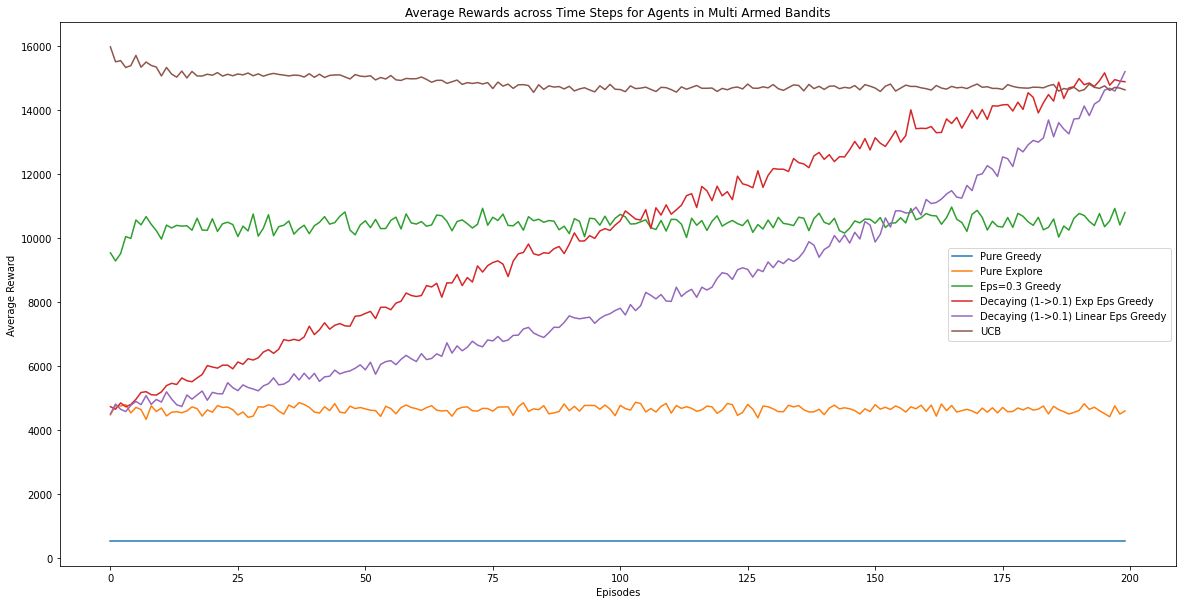

In [33]:
#decaying epsilon greedy, but decays to final value of 0.1 till the last episode
#also averaging
AvgRewardsNGaussianBandits(N=25, episodes=200, block_type=1, decayTill=200)

100%|██████████| 25/25 [09:19<00:00, 22.38s/it]


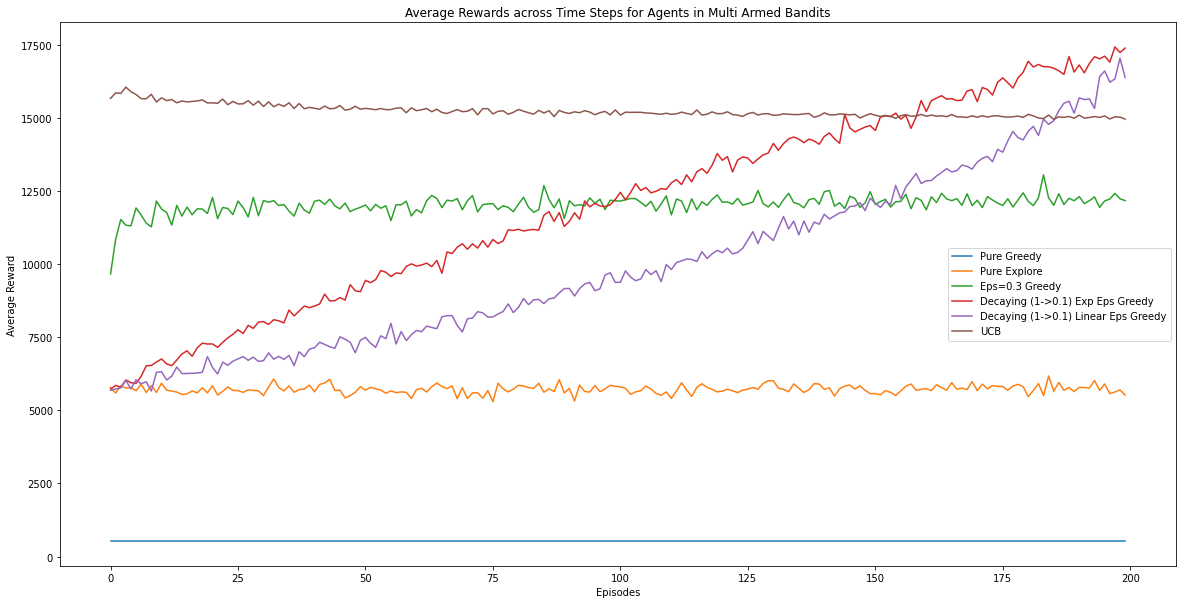

In [12]:
#decaying epsilon greedy, but decays to final value of 0.1 till the last episode
#also averaging
AvgRewardsNGaussianBandits(N=25, episodes=200, block_type=2)

100%|██████████| 25/25 [09:45<00:00, 23.42s/it]


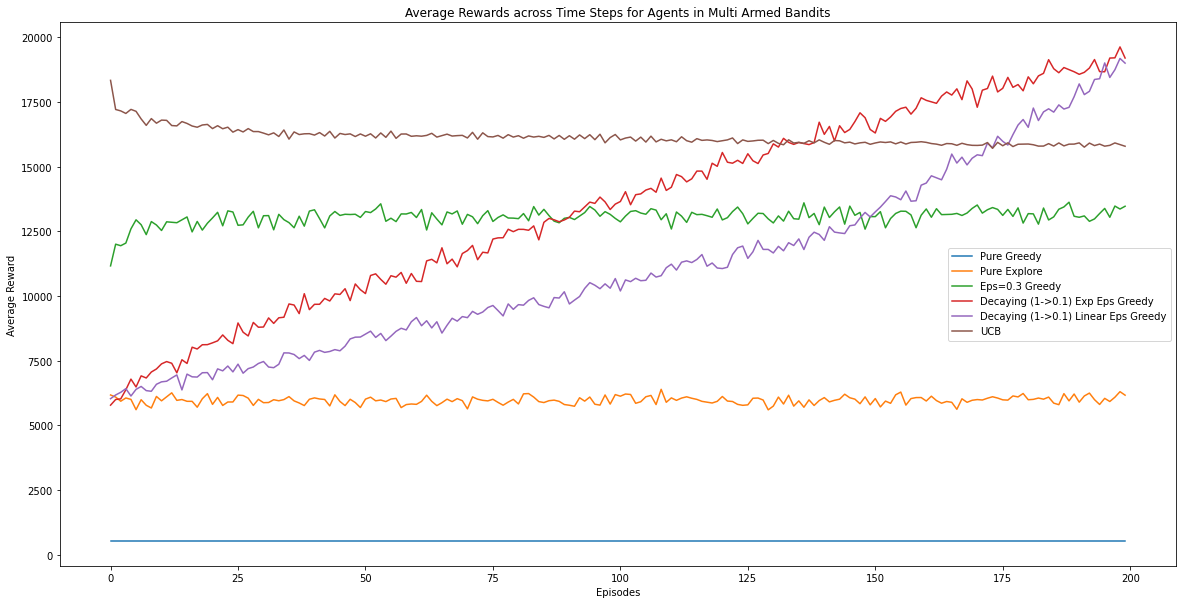

In [13]:
AvgRewardsNGaussianBandits(N=25, episodes=200, block_type=3)

100%|██████████| 10/10 [03:52<00:00, 23.26s/it]


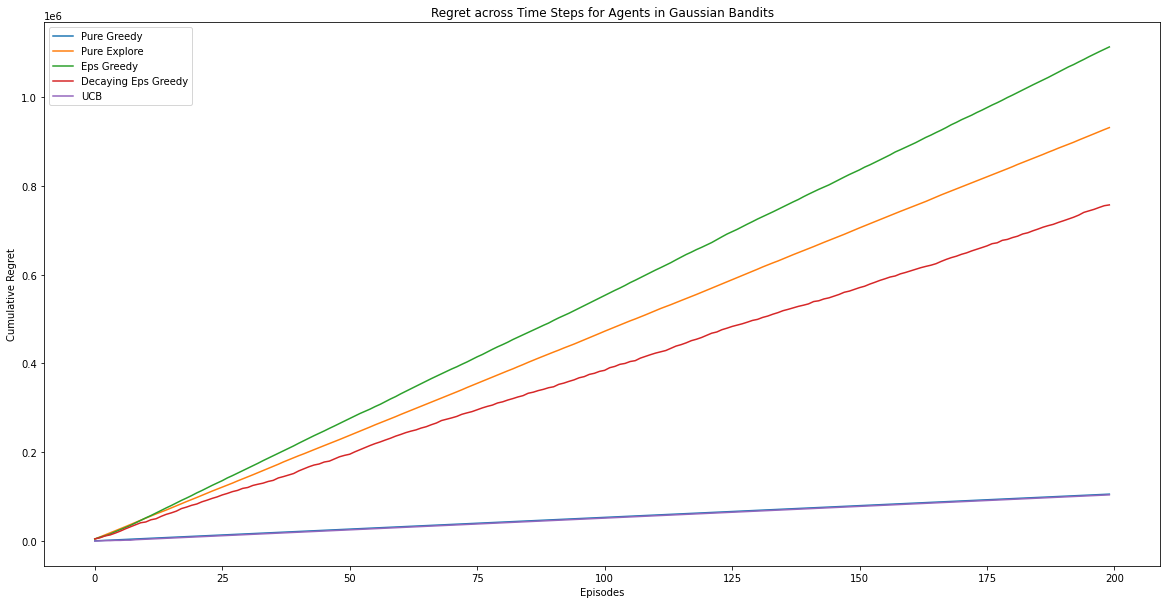

In [24]:
def RegretNGaussianBandits(N=50, episodes=10**3):
    pureGreedy_R = []
    pureExplore_R = []
    epsGreedy_R = []
    decEpsGreedy_R = []
    UCB_R = []
    softMax_R = []

    for i in tqdm(range(N)):
        genv = gym.make('foraging-replenishing-patches-v0')
        _,rs = pureGreedy(env=genv, maxEpisodes = episodes)
        pureGreedy_R.append(rs)
        _,rs = pureExplore(env=genv, maxEpisodes=episodes)
        pureExplore_R.append(rs)
        _,rs = epsGreedy(env=genv, maxEpisodes=episodes, eps=0.3)
        epsGreedy_R.append(rs)
        _,rs = decEpsGreedy(env=genv, maxEpisodes=episodes, eps_start=1, eps_end=0.0)
        decEpsGreedy_R.append(rs)
        _,rs = UCB(env=genv, maxEpisodes=episodes, c=0.5)
        UCB_R.append(rs)
        # _,rs = softMax(env=genv, maxEpisodes=episodes, temp_start=10**2, temp_end=0.01)
        # softMax_R.append(rs)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.title("Regret across Time Steps for Agents in Gaussian Bandits")
    plt.xlabel('Episodes')
    plt.ylabel('Cumulative Regret') 
    plt.plot(np.arange(episodes), np.mean(np.cumsum(pureGreedy_R,axis=1),axis=0), label='Pure Greedy')
    plt.plot(np.arange(episodes), np.mean(np.cumsum(pureExplore_R,axis=1),axis=0), label='Pure Explore')
    plt.plot(np.arange(episodes), np.mean(np.cumsum(epsGreedy_R,axis=1),axis=0), label='Eps Greedy')
    plt.plot(np.arange(episodes), np.mean(np.cumsum(decEpsGreedy_R,axis=1),axis=0), label='Decaying Eps Greedy')
    plt.plot(np.arange(episodes), np.mean(np.cumsum(UCB_R,axis=1),axis=0), label='UCB')
    # plt.plot(np.arange(episodes), np.mean(np.cumsum(softMax_R,axis=1),axis=0), label='Soft Max')
    plt.legend()
    plt.show() 

RegretNGaussianBandits(N=10, episodes=200)